### 导入依赖包

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


### 加载数据集

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### 查看训练集图片

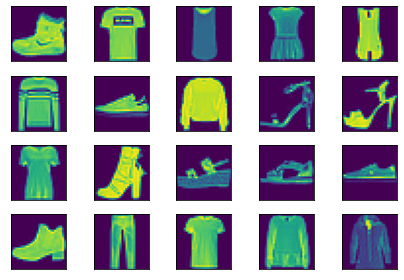

In [3]:
fig, ax = plt.subplots(nrows=4, ncols=5, sharex='all', sharey='all')
ax = ax.flatten()
for i in range(20):
    img = train_images[i]
    ax[i].imshow(img)
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### 查看标签类别

In [4]:
labels = np.unique(train_labels)
print(labels)

[0 1 2 3 4 5 6 7 8 9]


### 对图片进行归一化

In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
print(train_images.shape, test_images.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 搭建模型

In [6]:
model = tf.keras.models.Sequential([
    Conv2D(filters=6, kernel_size=(3, 3), padding='valid'),
    BatchNormalization(),
    Activation('relu'),
    
    Conv2D(filters=6, kernel_size=(3, 3), padding='valid'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
    Dropout(0.4),
    Flatten(),
    Dense(10, activation='softmax')
])

### 指定优化器、损失函数、评价指标

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 训练模型

In [8]:
history = model.fit(train_images, train_labels,
                    epochs=5,
                    validation_data=(test_images, test_labels),
                    verbose=2)

Epoch 1/5
1875/1875 - 8s - loss: 0.5670 - accuracy: 0.7982 - val_loss: 0.4059 - val_accuracy: 0.8542
Epoch 2/5
1875/1875 - 4s - loss: 0.4163 - accuracy: 0.8511 - val_loss: 0.3604 - val_accuracy: 0.8727
Epoch 3/5
1875/1875 - 4s - loss: 0.3819 - accuracy: 0.8612 - val_loss: 0.3415 - val_accuracy: 0.8798
Epoch 4/5
1875/1875 - 4s - loss: 0.3675 - accuracy: 0.8697 - val_loss: 0.3502 - val_accuracy: 0.8750
Epoch 5/5
1875/1875 - 4s - loss: 0.3561 - accuracy: 0.8726 - val_loss: 0.3252 - val_accuracy: 0.8861


### 查看模型结构

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 6)         24        
_________________________________________________________________
activation (Activation)      (None, 26, 26, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 6)         330       
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 6)         24        
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 6)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0

### 显示模型准确率的变化过程

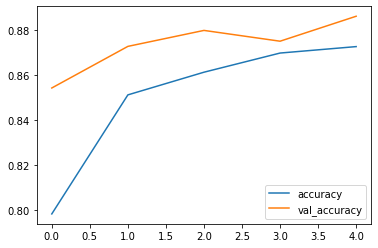

In [10]:
plt.plot(history.epoch, history.history.get('accuracy'), label='accuracy')
plt.plot(history.epoch, history.history.get('val_accuracy'), label='val_accuracy')
plt.legend()
plt.show()

### 显示模型损失的变化过程

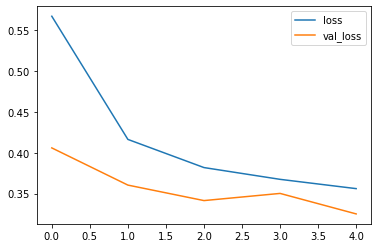

In [11]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()